<a href="https://colab.research.google.com/github/mjkanf1994/ml_edu/blob/master/netflix_python_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix 영화 및 TV 프로그램
- https://www.kaggle.com/shivamb/netflix-shows

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/'My Drive'/'Colab Notebooks/ml_project'

/content/drive/My Drive/Colab Notebooks/ml_project


In [3]:
%pwd

'/content/drive/My Drive/Colab Notebooks/ml_project'

In [4]:
%ls

gender_submission.csv  netflix_titles.csv  submission.csv  test.csv  train.csv


In [5]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# import sample_submission file
df= pd.read_csv('netflix_titles.csv')

In [7]:
display(df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [55]:
df1.describe()

,release_year
count,6234.00000
mean,2013.35932
std,8.81162
min,1925.00000
25%,2013.00000
50%,2016.00000
75%,2018.00000
max,2020.00000


In [54]:
df1.describe(include=np.object)

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,6234,6234,4265,5664,5758,6223,6224,6234,6234,6234
unique,2,6172,3301,5469,554,1524,14,201,461,6226
top,Movie,Limitless,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,18,18,2032,122,2027,1321,299,3


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
df.shape

(6234, 12)

NA값에 대해서 unknown으로 대체시킨다.

In [11]:
 df.fillna(value='unknown')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,unknown,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,unknown,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,unknown,unknown,unknown,unknown,2016,unknown,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,unknown,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [12]:
df1=df.drop(df.columns[[0]], axis='columns')

분석을 위해서 id는 제외시켜준다.

In [50]:
df1

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


type에 따른 bar그래프를 그려준다.

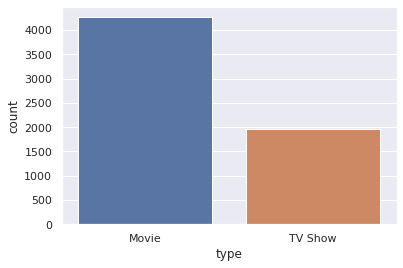

In [20]:
sns.countplot(x='type',data = df)
plt.show()

rationg에 따른 bar그래프를 그려준다.

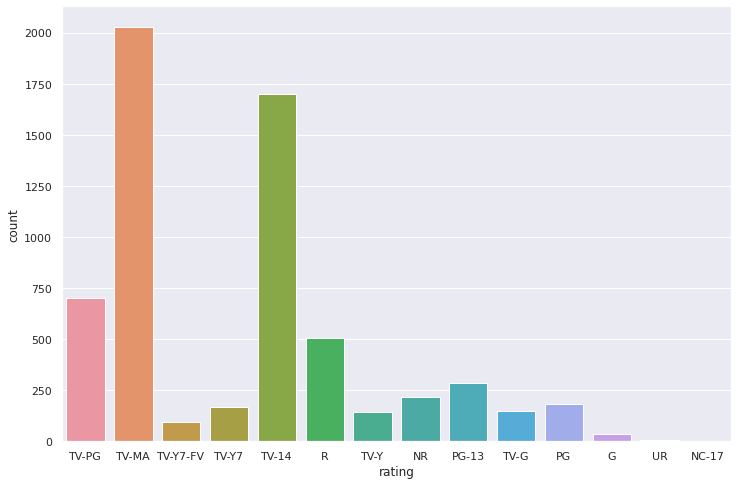

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

 relaease year에 따른 bar그래프를 그려준다

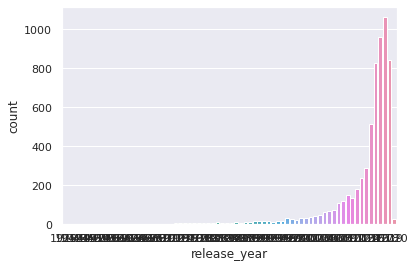

In [27]:
sns.countplot(x='release_year',data = df)
plt.show()

-연도별 Movie와 Tv show가 유입된 량을 표현한다.

In [26]:
import plotly.graph_objects as go
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year


movie_per_year=[]

tv_shows_per_year=[]
for i in range(2010,2020):
    h=df.loc[(df['type']=='Movie') & (df.year_added==i)] 
    g=df.loc[(df['type']=='TV Show') & (df.year_added==i)] 
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))

    

trace1 = go.Scatter(x=[i for i in range(2008,2020)],y=movie_per_year,mode='lines+markers',name='Movies')

trace2=go.Scatter(x=[i for i in range(2008,2020)],y=tv_shows_per_year,mode='lines+markers',name='TV Shows')

data=[trace1,trace2]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))

fig = go.Figure(data, layout=layout)

fig.show()

In [30]:
df["country"].value_counts()

United States                                       2032
India                                                777
United Kingdom                                       348
Japan                                                176
Canada                                               141
                                                    ... 
Denmark, China                                         1
Italy, Switzerland, France, Germany                    1
South Africa, United States, New Zealand, Canada       1
Canada, United States, India, United Kingdom           1
Spain, France, Italy                                   1
Name: country, Length: 554, dtype: int64

In [34]:
gb = df.groupby(['country'])
gb.get_group('United States' )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017.0
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,70153412,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN


In [35]:
gb = df.groupby(['country'])
gb.get_group('India' )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,2019-09-06,2019,TV-MA,125 min,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...,2019.0
37,81052275,Movie,Ee Nagaraniki Emaindi,Tharun Bhascker,"Vishwaksen Naidu, Sushanth Reddy, Abhinav Goma...",India,2019-09-06,2018,TV-14,133 min,"Comedies, International Movies","In Goa and in desperate need of cash, four chi...",2019.0
41,70303496,Movie,PK,Rajkumar Hirani,"Aamir Khan, Anuskha Sharma, Sanjay Dutt, Saura...",India,2018-09-06,2014,TV-14,146 min,"Comedies, Dramas, International Movies",Aamir Khan teams with director Rajkumar Hirani...,2018.0
58,81155784,Movie,Watchman,A. L. Vijay,"G.V. Prakash Kumar, Samyuktha Hegde, Suman, Ra...",India,2019-09-04,2019,TV-14,93 min,"Comedies, Dramas, International Movies","Rushing to pay off a loan shark, a young man b...",2019.0
99,80225885,TV Show,Bard of Blood,NaN,"Emraan Hashmi, Viineet Kumar, Sobhita Dhulipal...",India,2019-09-27,2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","Years after a disastrous job in Balochistan, a...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,80171439,Movie,The Human Factor: The Untold Story of the Bomb...,Rudradeep Bhattacharjee,NaN,India,2017-04-01,2013,TV-PG,53 min,"Documentaries, International Movies, Music & M...",A family of Parsi musicians collectively works...,2017.0
5708,81011159,TV Show,Little Things,NaN,"Dhruv Sehgal, Mithila Palkar",India,2019-11-09,2019,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",A cohabiting couple in their 20s navigate the ...,2019.0
5839,80178836,TV Show,The House That Made Me,NaN,Vinay Pathak,India,2017-03-31,2015,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",2017.0
5867,80207879,TV Show,Sab Jholmaal Hai,Vijay Roche,NaN,India,2019-03-01,2017,TV-G,4 Seasons,"Kids' TV, TV Comedies","In this madcap comedy, two mischievous cats, a...",2019.0


In [36]:
gb = df.groupby(['country'])
gb.get_group('United Kingdom' )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0
42,80162141,Movie,Hard Tide,"Robert Osman, Nathanael Wiseman","Nathanael Wiseman, Mem Ferda, Alexandra Newick...",United Kingdom,2017-09-06,2015,TV-MA,79 min,"Dramas, Independent Movies",A drug dealer who's been emulating his father'...,2017.0
43,80095641,Movie,Elstree 1976,Jon Spira,"Paul Blake, Jeremy Bulloch, John Chapman, Anth...",United Kingdom,2016-09-06,2015,TV-PG,102 min,Documentaries,Then and now footage of bit players who appear...,2016.0
62,81054495,Movie,Mo Gilligan: Momentum,Chris Howe,Mo Gilligan,United Kingdom,2019-09-30,2019,TV-MA,64 min,Stand-Up Comedy,Comedian Mo Gilligan blends smooth moves and s...,2019.0
72,80181555,TV Show,The Royal House of Windsor,NaN,NaN,United Kingdom,2017-09-30,2017,TV-14,1 Season,"British TV Shows, Docuseries, International TV...","Drawing on newly available info, this show tra...",2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6180,70250398,TV Show,Vexed,NaN,"Toby Stephens, Miranda Raison, Lucy Punch, Nic...",United Kingdom,2017-08-01,2012,TV-MA,2 Seasons,"British TV Shows, Crime TV Shows, Internationa...",Charming slacker DI Jack Armstrong and driven ...,2017.0
6186,70258489,TV Show,Derek,NaN,"Ricky Gervais, Kerry Godliman, Karl Pilkington...",United Kingdom,2019-04-05,2015,TV-14,3 Seasons,"British TV Shows, International TV Shows, TV C...",Ricky Gervais created and stars in this heartw...,2019.0
6190,80130911,TV Show,Chewing Gum,NaN,"Michaela Coel, John Macmillan, Robert Lonsdale...",United Kingdom,2017-04-04,2017,TV-MA,2 Seasons,"British TV Shows, International TV Shows, Roma...","The virginal Tracey, who was raised in a stric...",2017.0
6204,80091341,TV Show,Cuckoo,NaN,"Andy Samberg, Taylor Lautner, Greg Davies, Hel...",United Kingdom,2019-04-19,2019,TV-14,5 Seasons,"British TV Shows, International TV Shows, TV C...",Rachel shocks her proper British parents when ...,2019.0


In [37]:
gb = df.groupby(['country'])
gb.get_group('Canada' )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
56,81173255,Movie,The Heretics,Chad Archibald,"Nina Kiri, Ry Barrett, Jorja Cadence, Will Kin...",Canada,2019-09-04,2017,TV-MA,88 min,Horror Movies,A withdrawn young woman hunted by a malicious ...,2019.0
128,70304191,Movie,Swearnet: The Movie,Warren P. Sonoda,"Mike Smith, John Paul Tremblay, Robb Wells, Pa...",Canada,2017-09-24,2014,NR,112 min,"Comedies, International Movies","After losing a TV network deal, the Trailer Pa...",2017.0
163,81035117,Movie,True: Tricky Treat Day,NaN,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",Canada,2019-09-20,2019,TV-Y,24 min,Children & Family Movies,It's up to True and her friends to save the da...,2019.0
456,80237905,Movie,In the Tall Grass,Vincenzo Natali,"Patrick Wilson, Laysla De Oliveira, Avery Whit...",Canada,2019-10-04,2019,TV-MA,102 min,"Horror Movies, Thrillers","After hearing a boy's cry for help, a pregnant...",2019.0
496,80092857,Movie,Pup Star,Robert Vince,"Makenzie Moss, Jed Rees, David DeLuise, Carla ...",Canada,2016-10-29,2016,G,92 min,"Children & Family Movies, Comedies",After a singing pup with big dreams of stardom...,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6174,70171946,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2019-08-01,2017,TV-PG,11 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...,2019.0
6192,80199128,TV Show,Kim's Convenience,NaN,"Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Si...",Canada,2019-04-03,2019,TV-14,3 Seasons,TV Comedies,"While running a convenience store in Toronto, ...",2019.0
6208,70227189,TV Show,Lost Girl,NaN,"Anna Silk, Kris Holden-Ried, Ksenia Solo, Rich...",Canada,2016-04-17,2015,TV-14,5 Seasons,"TV Dramas, TV Horror, TV Mysteries",Discovering she's a succubus who sustains hers...,2016.0
6209,70264078,TV Show,Mr. Young,NaN,"Brendan Meyer, Matreya Fedor, Gig Morton, Kurt...",Canada,2019-04-16,2013,TV-G,2 Seasons,"Kids' TV, TV Comedies","After Adam graduates from college at age 14, h...",2019.0


In [39]:
gb = df.groupby(['country'])
gb.get_group('Spain' )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017.0
97,80992039,Movie,Two Catalonias,"Álvaro Longoria, Gerardo Olivares",NaN,Spain,2018-09-28,2018,TV-MA,117 min,"Documentaries, International Movies",Lawmakers and activists with conflicting ideol...,2018.0
161,81000389,TV Show,The Hockey Girls,"Kiko Cruz Claverol, Patricia Font","Iria del Río, Nora Navas, Josep Linuesa, Natàl...",Spain,2019-09-20,2019,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",The passionate members of a girls' roller hock...,2019.0
334,81003984,Movie,Barça Dreams,Jordi Llompart,"Johan Cruyff, Andrés Iniesta, Gary Lineker, Xa...",Spain,2018-09-01,2015,TV-14,122 min,"Documentaries, International Movies, Sports Mo...",Explore the history and philosophies behind on...,2018.0
411,80114419,Movie,Off Course,Nacho G. Velilla,"Yon González, Julián López, Blanca Suárez, Mal...",Spain,2016-09-01,2015,TV-MA,107 min,"Comedies, International Movies",Fed up with the uselessness of their degrees a...,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,80021966,TV Show,El Barco,NaN,"Juanjo Artero, Mario Casas, Blanca Suárez, Ire...",Spain,2017-07-01,2013,NR,3 Seasons,"International TV Shows, Romantic TV Shows, Spa...",Forty young crew members traveling aboard a tr...,2017.0
5991,80064235,TV Show,The Ministry of Time,NaN,"Rodolfo Sancho, Aura Garrido, Nacho Fresneda, ...",Spain,2018-01-28,2017,TV-MA,3 Seasons,"International TV Shows, Spanish-Language TV Sh...",Three officers from different eras work for a ...,2018.0
6056,80215507,TV Show,Velvet Colección,NaN,"Marta Hazas, Asier Etxeandía, Adrián Lastra, D...",Spain,2019-02-14,2018,TV-14,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...","In the late '60s, fashion designer Ana enlists...",2019.0
6127,80100929,TV Show,Cable Girls,NaN,"Blanca Suárez, Nadia de Santiago, Ana Fernánde...",Spain,2019-08-09,2019,TV-MA,4 Seasons,"International TV Shows, Romantic TV Shows, Spa...","In 1920s Madrid, four women at the National Te...",2019.0


나라별 감독 TOP10

In [41]:
def country_top_dir(country):
    indian_dir=df.loc[(df.country==str(country)) & (df.type=="Movie")]
    # indian_dir.director.value_counts()[:12]

    col = "director"
    categories = ", ".join(indian_dir[col].fillna("")).split(", ")

    directors=pd.Series(categories)
    directors=directors.value_counts()[1:16]

    trace=go.Bar(x=directors.values[:10][::-1],y=directors.index[:10][::-1],orientation='h',marker=dict(color='#a678de'))
    return trace
from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain",""]
for title in titles:
    if title != "":
        traces.append(country_top_dir(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)

fig.update_layout(height=1200, showlegend=False)
fig.show()

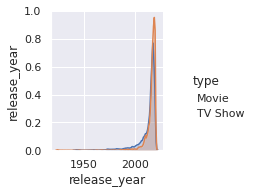

In [56]:
sns.pairplot(df1, hue="type");